In [1]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt


from data_utils import *
from rbm import *

## Explore the dataset : Binary-alpha-digits

In [2]:
path = "datasets/binaryalphadigs.mat"
dataset = loadmat(path)

In [3]:
# Extract the images and labels (specific to the dataset structure)

data = dataset['dat']
labels = dataset['classlabels']

images = [np.array(data[i][0]) for i in range(data.shape[0])]
labels = labels.flatten()



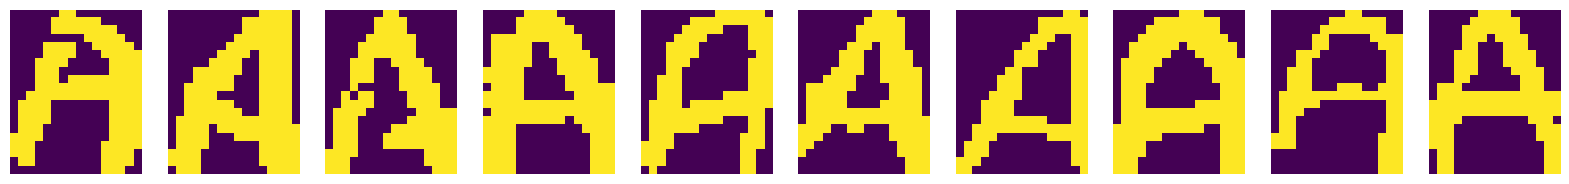

In [65]:
item_list = ['A']
As = data[get_indices(item_list)].flatten()
visualize_samples(As)

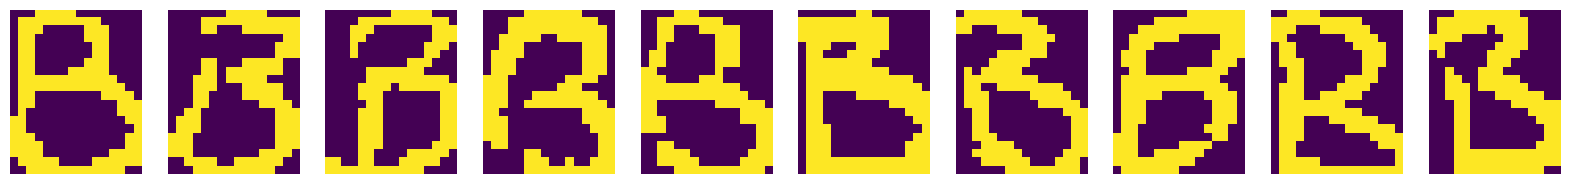

In [86]:
item_list = ['B']
Bs = data[get_indices(item_list)].flatten()
visualize_samples(Bs)

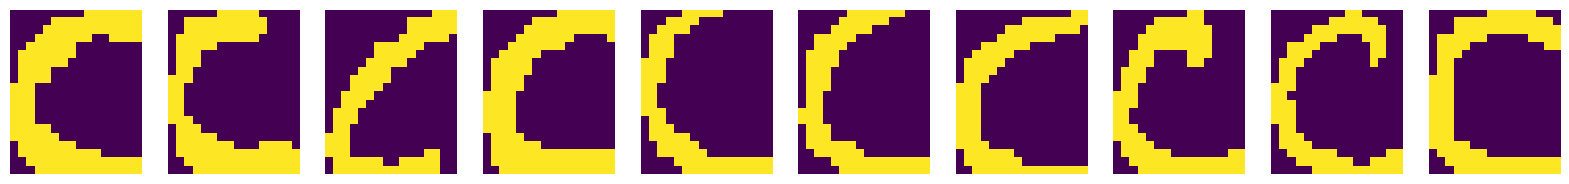

In [6]:
item_list = ['C']
Cs = data[get_indices(item_list)].flatten()
visualize_samples(Cs)

## Learning the RBM

#### A's dataset

In [204]:
####   params init   #####

X = np.array( [item.flatten() for item in As] ).astype('float')
p = X.shape[1]

n_epochs = 300
batch_size = 16
lr = 0.05


## hyper params : 
q = int(p*1.5)  # take q = 1.5x times the input dimension


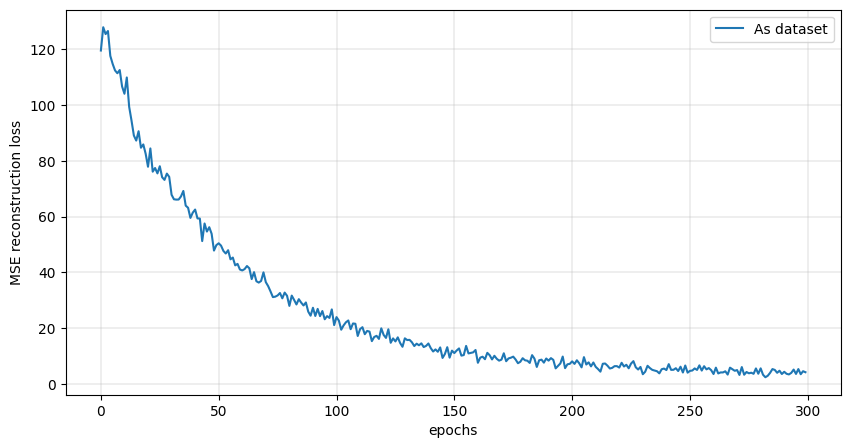

In [94]:
#####   init the model ########

model = RBMmodel(p, q, X, n_epochs, batch_size, lr )
lossA = model.train()

plt.figure(figsize=(10,5))
plt.plot(np.array(range(len(lossA))), lossA, label = 'As dataset')
plt.xlabel('epochs')
plt.ylabel('MSE reconstruction loss')
plt.grid(linewidth = 0.3)
plt.legend()

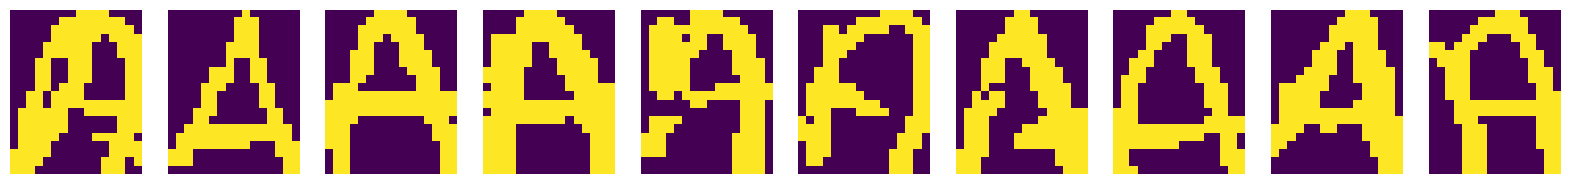

In [95]:
img_gen_A = model.generate_images_GibbsSampling(L= 1000, num_images=10)
visualize_samples(img_gen_A)

### Study : learning-rate 

In [66]:


####   params init   #####
As_models = []
As_losss = []

lr_s= [0.001, 0.01, 0.05, 0.1, 0.5]

for lr in lr_s:
    model = RBMmodel(p, q, X, n_epochs, batch_size, lr )
    As_models.append(model)
    loss = model.train()
    As_losss.append(loss)



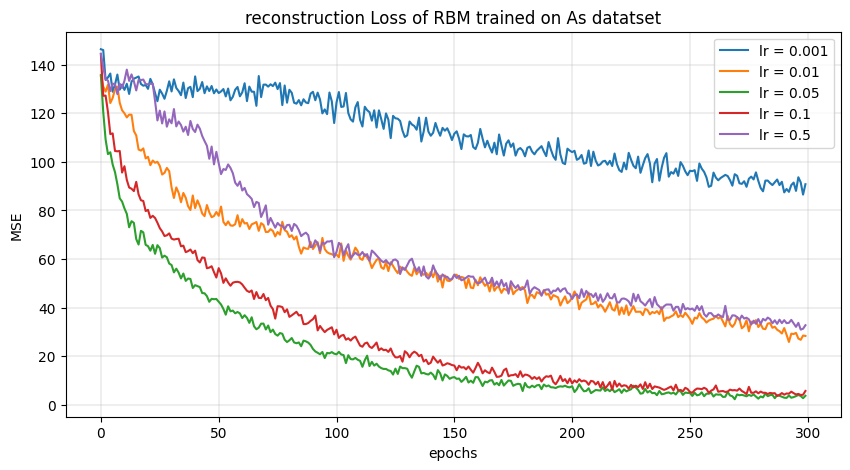

In [67]:
plt.figure(figsize=(10,5))
plt.plot(np.array(range(n_epochs)), As_losss[0], label = 'lr = 0.001')
plt.plot(np.array(range(n_epochs)), As_losss[1], label = 'lr = 0.01')
plt.plot(np.array(range(n_epochs)), As_losss[2], label = 'lr = 0.05')
plt.plot(np.array(range(n_epochs)), As_losss[3], label = 'lr = 0.1')
plt.plot(np.array(range(n_epochs)), As_losss[4], label = 'lr = 0.5')

plt.xlabel('epochs')

plt.ylabel('MSE')
plt.grid(linewidth = 0.3)
plt.title('reconstruction Loss of RBM trained on As datatset')

plt.legend()

>>> in DeepLearing, choosing appropriate learning rate is a crucial taks to achieve giid convergence.

>>> for the next experiments, a learnining rate of size = 0.05 will be taken

### Study : q-hyper_parameter for As and ABCs dataset:

#### As dataset:

In [205]:
lr = 0.05

As_models = []
As_losss = []
q_s = [int(p/50), int(p/10),int(p/2), p, 2*p, 3*p]

img_gen_a_s = []

for q in q_s:
    model = RBMmodel(p, q, X, n_epochs, batch_size, lr )
    loss = model.train()
    As_losss.append(loss)
    img_gen = model.generate_images_GibbsSampling(L= 1000, num_images=10)
    img_gen_a_s.append(img_gen)

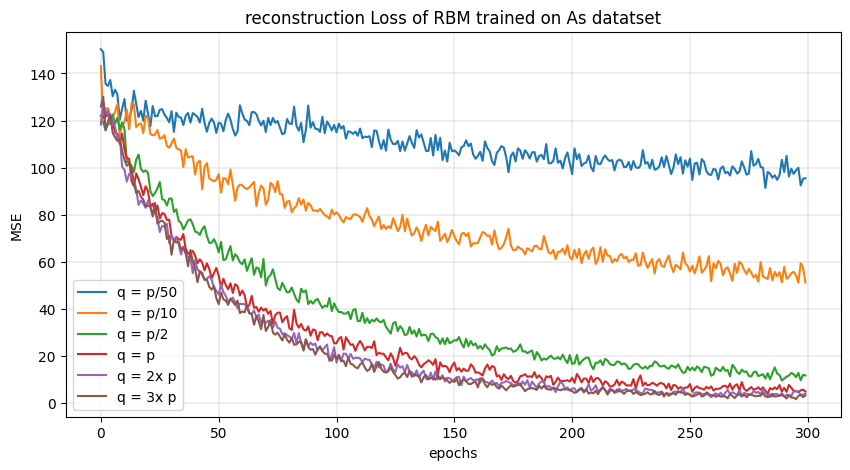

In [206]:
plt.figure(figsize=(10,5))
plt.plot(np.array(range(n_epochs)), As_losss[0], label = 'q = p/50')
plt.plot(np.array(range(n_epochs)), As_losss[1], label = 'q = p/10')
plt.plot(np.array(range(n_epochs)), As_losss[2], label = 'q = p/2')
plt.plot(np.array(range(n_epochs)), As_losss[3], label = 'q = p')
plt.plot(np.array(range(n_epochs)), As_losss[4], label = 'q = 2x p')
plt.plot(np.array(range(n_epochs)), As_losss[5], label = 'q = 3x p')

plt.xlabel('epochs')

plt.ylabel('MSE')
plt.grid(linewidth = 0.3)
plt.title('reconstruction Loss of RBM trained on As datatset')

plt.legend()

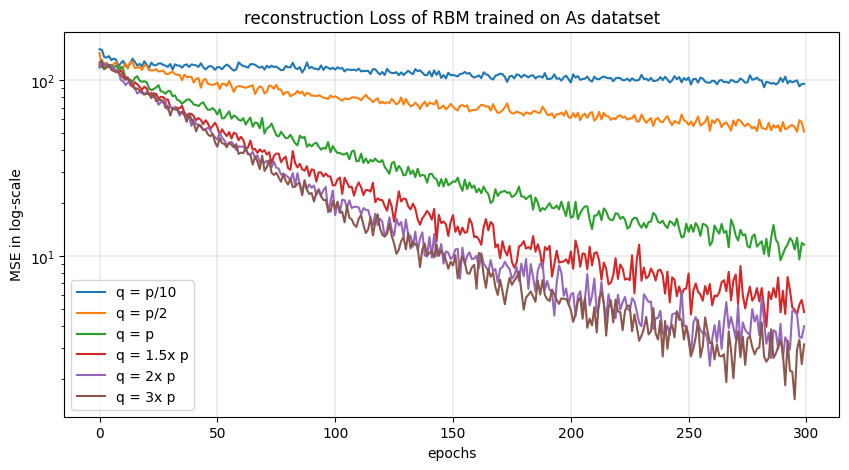

In [207]:
plt.figure(figsize=(10,5))
plt.plot(np.array(range(n_epochs)), As_losss[0], label = 'q = p/10')
plt.plot(np.array(range(n_epochs)), As_losss[1], label = 'q = p/2')
plt.plot(np.array(range(n_epochs)), As_losss[2], label = 'q = p')
plt.plot(np.array(range(n_epochs)), As_losss[3], label = 'q = 1.5x p')
plt.plot(np.array(range(n_epochs)), As_losss[4], label = 'q = 2x p')
plt.plot(np.array(range(n_epochs)), As_losss[5], label = 'q = 3x p')

plt.xlabel('epochs')

plt.ylabel('MSE in log-scale')
plt.grid(linewidth = 0.3)
plt.title('reconstruction Loss of RBM trained on As datatset')

plt.yscale('log')
plt.legend()

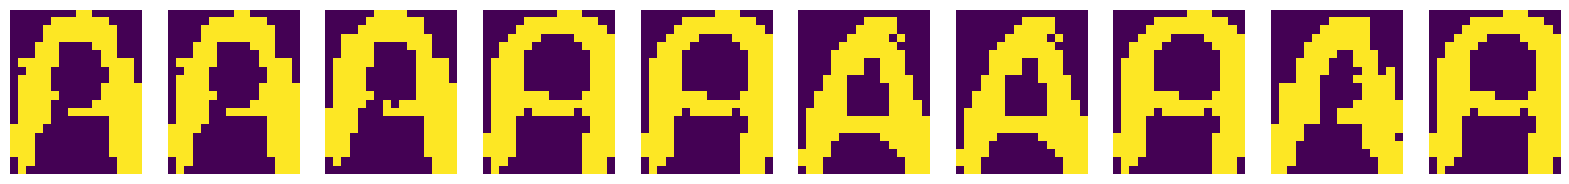

In [208]:
visualize_samples(img_gen_a_s[0])

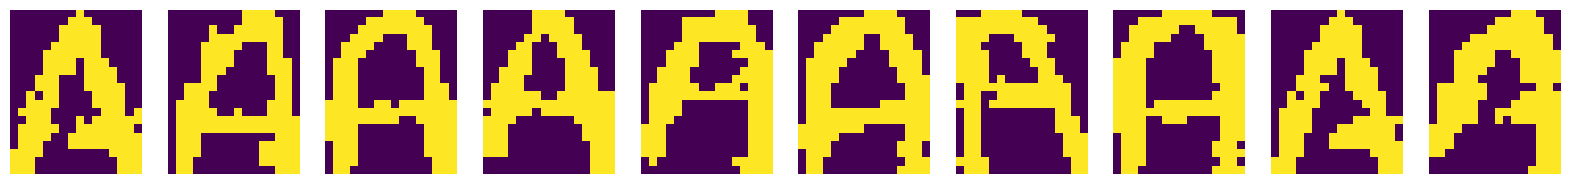

In [209]:
visualize_samples(img_gen_a_s[1])

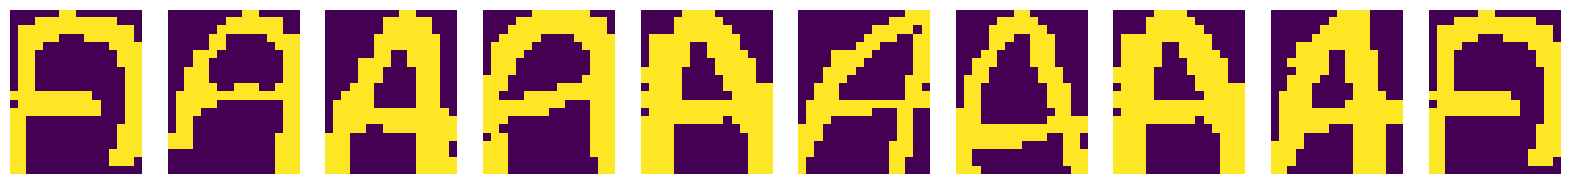

In [210]:
visualize_samples(img_gen_a_s[2])

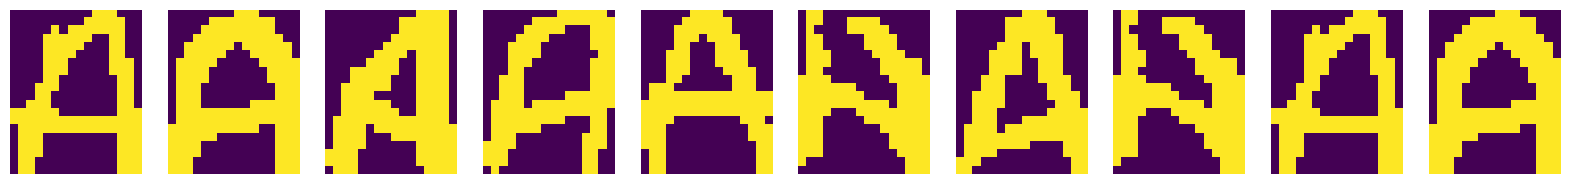

In [211]:
visualize_samples(img_gen_a_s[3])

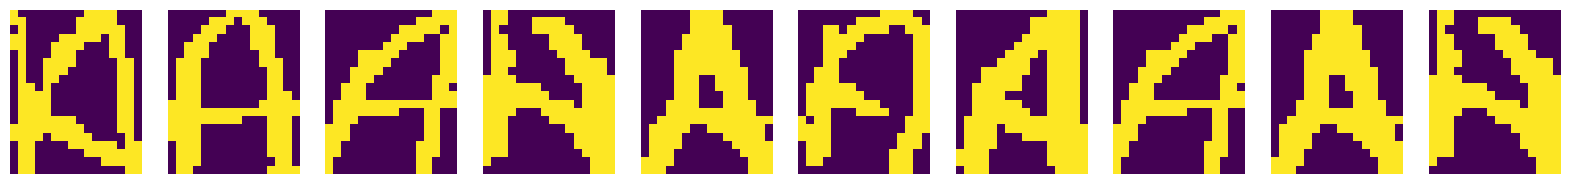

In [212]:
visualize_samples(img_gen_a_s[4])

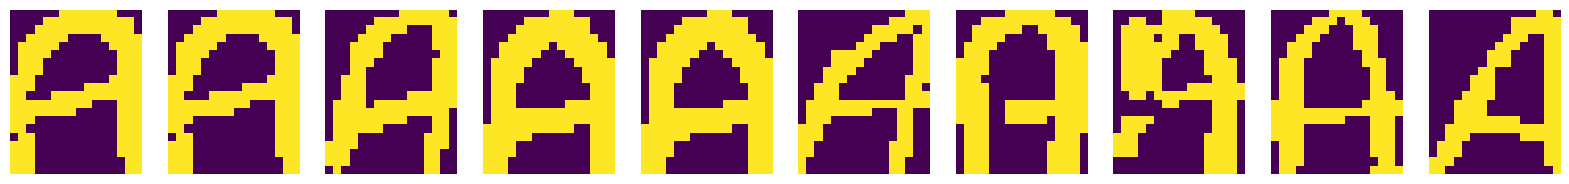

In [213]:
visualize_samples(img_gen_a_s[5])

#### ABCs datatset

In [214]:
item_list = ['A', 'B', 'C', 'D']
ABCs = data[get_indices(item_list)].flatten()

####   params init   #####
img_gen_abc_s = []
abc_models = []
abc_losss = []
q_s = [int(p/50), int(p/10),int(p/2), p, 2*p, 3*p]
X = np.array( [item.flatten() for item in ABCs] ).astype('float')



In [215]:
for q in q_s:
    model = RBMmodel(p, q, X, n_epochs, batch_size, lr )
    loss = model.train()
    abc_losss.append(loss)
    img_gen = model.generate_images_GibbsSampling(L= 1000, num_images=10)
    img_gen_abc_s.append(img_gen)


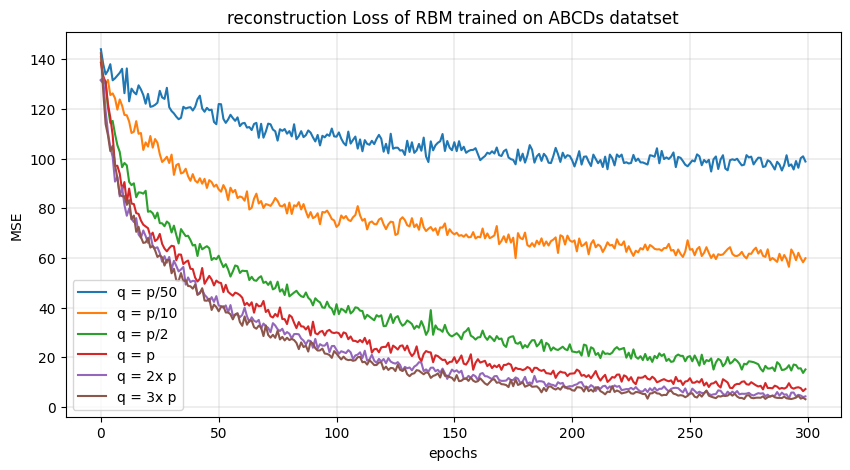

In [224]:
plt.figure(figsize=(10,5))
plt.plot(np.array(range(n_epochs)), abc_losss[0], label = 'q = p/50')
plt.plot(np.array(range(n_epochs)), abc_losss[1], label = 'q = p/10')
plt.plot(np.array(range(n_epochs)), abc_losss[2], label = 'q = p/2')
plt.plot(np.array(range(n_epochs)), abc_losss[3], label = 'q = p')
plt.plot(np.array(range(n_epochs)), abc_losss[4], label = 'q = 2x p')
plt.plot(np.array(range(n_epochs)), abc_losss[5], label = 'q = 3x p')

plt.xlabel('epochs')

plt.ylabel('MSE')
plt.grid(linewidth = 0.3)
plt.title('reconstruction Loss of RBM trained on ABCDs datatset')

plt.legend()

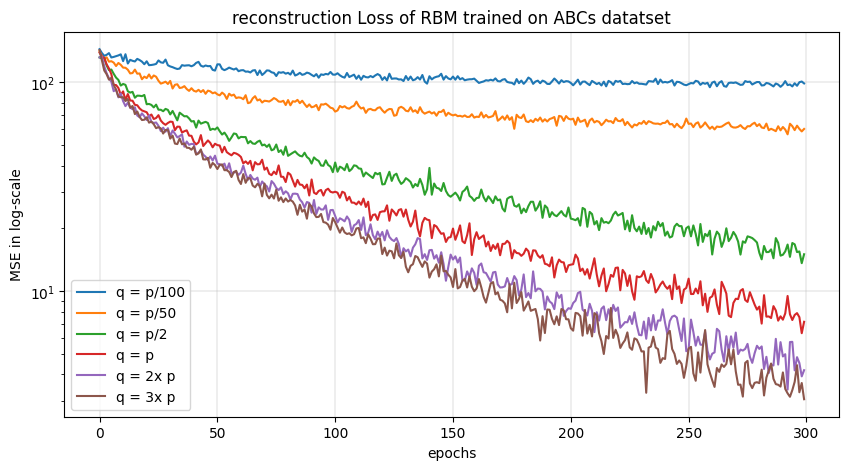

In [217]:
plt.figure(figsize=(10,5))
plt.plot(np.array(range(n_epochs)), abc_losss[0], label = 'q = p/100')
plt.plot(np.array(range(n_epochs)), abc_losss[1], label = 'q = p/50')
plt.plot(np.array(range(n_epochs)), abc_losss[2], label = 'q = p/2')
plt.plot(np.array(range(n_epochs)), abc_losss[3], label = 'q = p')
plt.plot(np.array(range(n_epochs)), abc_losss[4], label = 'q = 2x p')
plt.plot(np.array(range(n_epochs)), abc_losss[5], label = 'q = 3x p')

plt.xlabel('epochs')

plt.ylabel('MSE in log-scale')
plt.grid(linewidth = 0.3)
plt.title('reconstruction Loss of RBM trained on ABCs datatset')

plt.yscale('log')
plt.legend()

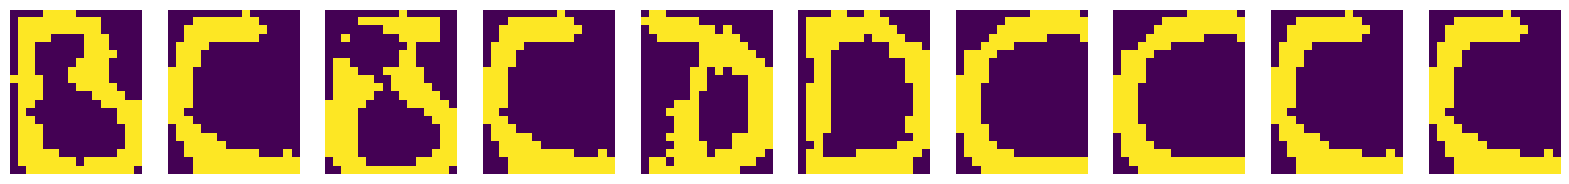

In [218]:
visualize_samples(img_gen_abc_s[0])

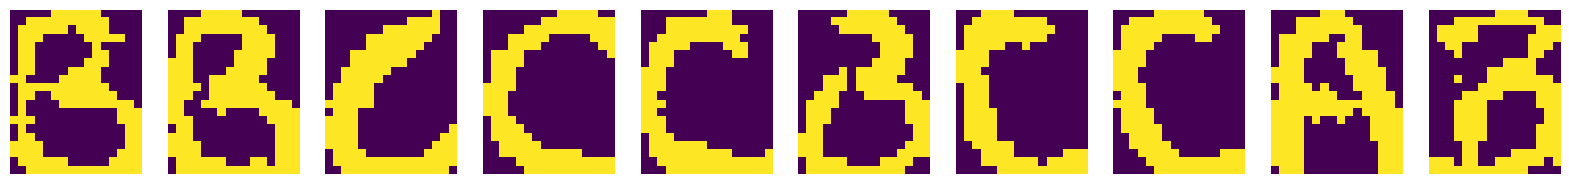

In [219]:
visualize_samples(img_gen_abc_s[1])

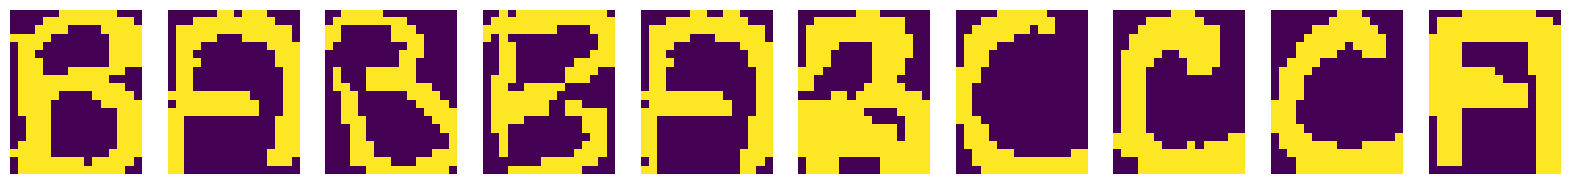

In [220]:
visualize_samples(img_gen_abc_s[2])

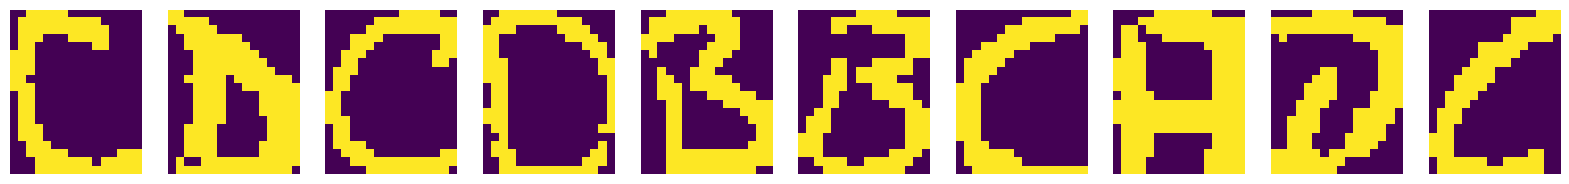

In [221]:
visualize_samples(img_gen_abc_s[3])

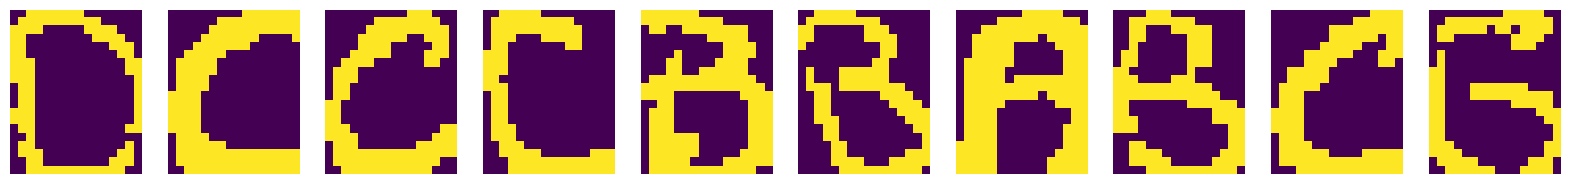

In [222]:
visualize_samples(img_gen_abc_s[4])

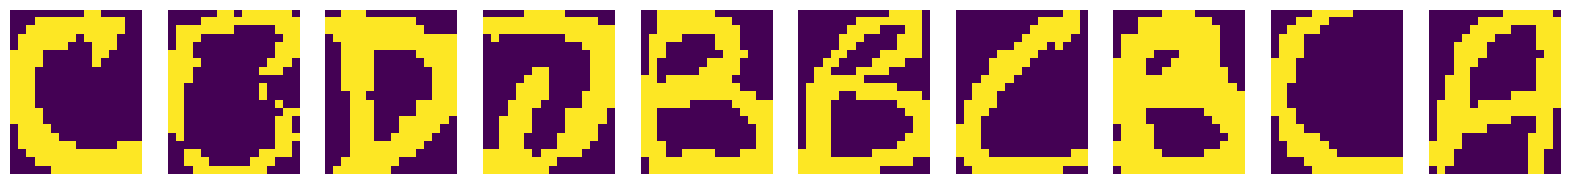

In [223]:
visualize_samples(img_gen_abc_s[5])

## Test The model on ALL ALPHABETS

In [225]:


item_list = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
            'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z']
all = data[get_indices(item_list)].flatten()

####   params init   #####
lr = 0.05
q = int(1.5*p)
X = np.array( [item.flatten() for item in all] ).astype('float')



In [226]:
model_dict = RBMmodel(p, q, X, n_epochs, batch_size, lr )
loss_dict = model_dict.train()

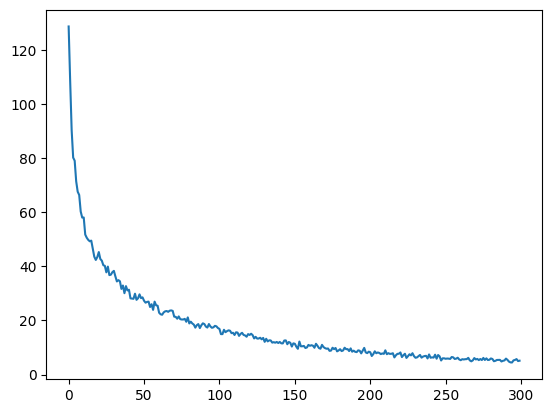

In [227]:
plt.plot(np.array(range(len(loss_dict))), loss_dict)

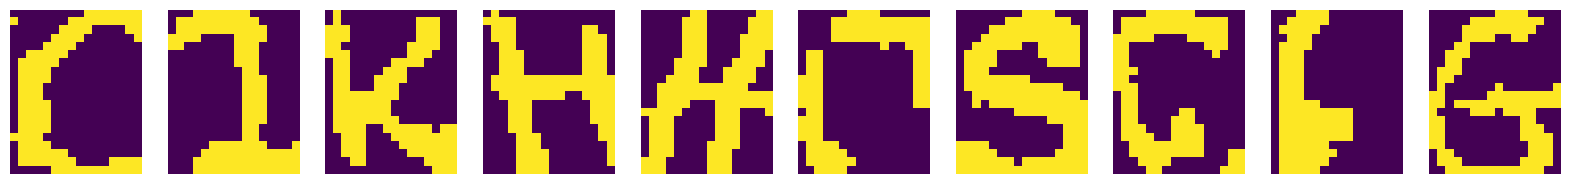

In [228]:
img_gen_dict = model_dict.generate_images_GibbsSampling(L= 1000, num_images=10)
visualize_samples(img_gen_dict)

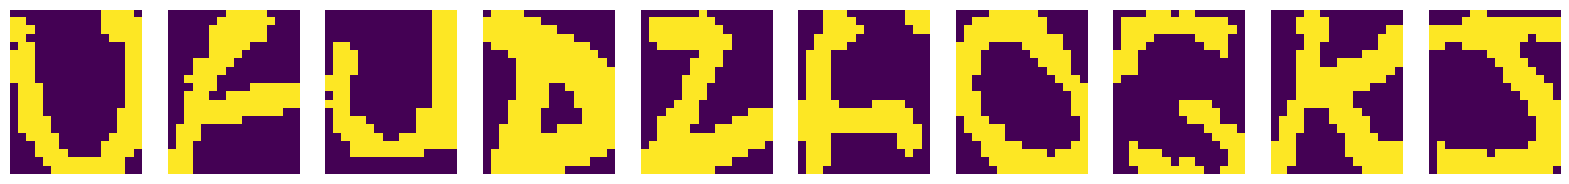

In [229]:
img_gen_dict = model_dict.generate_images_GibbsSampling(L= 1000, num_images=10)
visualize_samples(img_gen_dict)

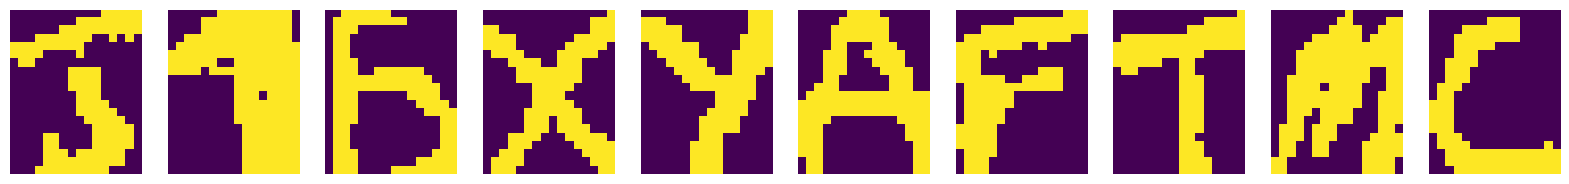

In [230]:
img_gen_dict = model_dict.generate_images_GibbsSampling(L= 1000, num_images=10)
visualize_samples(img_gen_dict)